In [1]:
import pandas as pd
import numpy as np

In [2]:
"T" * 0 # output is the empty string (i.e., not what you want)

''

In [3]:
"T" * 3 # Python is weird with Strings...

'TTT'

In [4]:
pd.to_numeric("T" * 0) # a quick test to verify it won't work

nan

In [4]:
pd.to_numeric("0") # gets the result we want

0

In [5]:
# read data
d_path = "lab05_climate_data.csv"
d = pd.read_csv(d_path)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
month          366 non-null int64
day            366 non-null int64
year           366 non-null int64
day_of_week    366 non-null object
t_max          366 non-null object
t_min          366 non-null int64
t_mean         366 non-null int64
precip         366 non-null object
dtypes: int64(5), object(3)
memory usage: 23.0+ KB


In [7]:
# step 1, convert the Ts to 0s, but as strings.

d['precip_no_ts'] = np.where(d['precip'] == 'T', '0', d['precip'])
d

,month,day,year,day_of_week,t_max,t_min,t_mean,precip,precip_no_ts
0,1,1,2020,Wednesday,47,22,35,0,0
1,1,2,2020,Thursday,44,23,34,0,0
2,1,3,2020,Friday,43,21,32,0,0
3,1,4,2020,Saturday,46,18,32,0,0
4,1,5,2020,Sunday,49,22,36,0,0
...,...,...,...,...,...,...,...,...,...
361,12,27,2020,Sunday,41,23,32,T,0
362,12,28,2020,Monday,35,23,29,0,0
363,12,29,2020,Tuesday,32,23,28,0.69,0.69
364,12,30,2020,Wednesday,32,-1,16,0,0


In [8]:
# step 2, convert the new column to a numeric
d['precip_numeric'] = pd.to_numeric(d['precip_no_ts'])
d.info() # verify it's now a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
month             366 non-null int64
day               366 non-null int64
year              366 non-null int64
day_of_week       366 non-null object
t_max             366 non-null object
t_min             366 non-null int64
t_mean            366 non-null int64
precip            366 non-null object
precip_no_ts      366 non-null object
precip_numeric    366 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 28.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92700bd3d0>]],
      dtype=object)

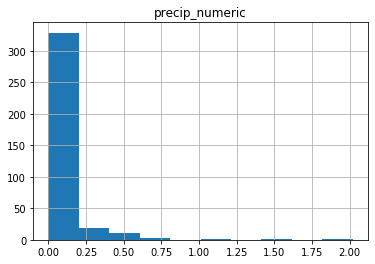

In [14]:
# quick histogram to be sure

d.hist(column = 'precip_numeric', bins = 10)

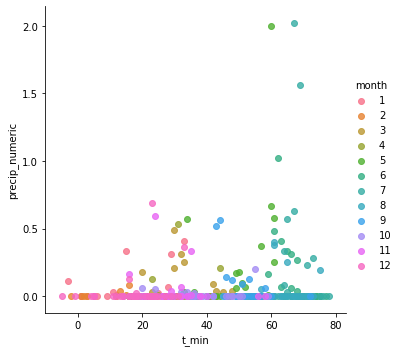

In [12]:
import seaborn as sns
sns.lmplot('t_min', 'precip_numeric', data=d, hue='month', fit_reg=False) # note, you could alter this to be month by name, not by numeric


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
month           366 non-null int64
day             366 non-null int64
year            366 non-null int64
day_of_week     366 non-null object
t_max           366 non-null object
t_min           366 non-null int64
t_mean          366 non-null int64
precip          366 non-null object
precip_no_ts    366 non-null object
dtypes: int64(5), object(4)
memory usage: 25.9+ KB


In [10]:
d_day_grouped = d.groupby('day_of_week')
d_day_grouped.sum()

,month,day,year,t_min,t_mean
day_of_week,,,,,
Friday,169,501,62620,1537,1875
Friday,166,328,42420,536,835
Monday,173,500,62620,1551,1874
Monday,167,332,42420,601,880
Saturday,188,528,70700,1585,2029
Saturday,149,291,34340,572,800
Sunday,183,501,64640,1610,1966
Sunday,156,310,40400,579,834
Thursday,168,486,62620,1519,1865
